# Time Series Forecasting - ARIMA

In [419]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from pathlib import Path
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
root = Path('/Users','alexandreberkovic','Desktop', 'Year_4','SIoT','IoT')

In [420]:
df = pd.read_csv(root / 'Output data/CSV/sensor.csv')

In [421]:
df.columns

Index(['Humidity', 'Temperature', 'Light', 'Time stamp', 'Date'], dtype='object')

In [422]:
df = df.drop('Date',axis = 1)

In [423]:
# time stamp column to ts instead of string
df['Time stamp'] = pd.to_datetime(df['Time stamp'], infer_datetime_format=True)

In [424]:
# # remove humidity levels below 50 (as those should not occur)
df = df.loc[df['Humidity'] >= 50]
# df = df.reset_index()

In [425]:
df = df.set_index('Time stamp')

In [426]:
df.head()

,Humidity,Temperature,Light
Time stamp,,,
2021-11-13 18:45:09.004,62.2,20.0,1256
2021-11-13 19:06:48.147,62.6,20.0,1755
2021-11-13 19:16:49.476,64.7,19.8,1747
2021-11-13 19:26:50.661,65.4,19.5,1736
2021-11-13 19:36:51.835,65.1,19.4,1738


In [427]:
humidity = df['Humidity']
temperature = df['Temperature']
light = df['Light']

In [428]:
# resampling at every 10min 
y = humidity.resample('10min').mean()

In [429]:
# y = y.dropna()

In [430]:
y.sort_index(inplace=True)

In [431]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [432]:
y

Time stamp
2021-11-13 18:40:00    62.2
2021-11-13 18:50:00     NaN
2021-11-13 19:00:00    62.6
2021-11-13 19:10:00    64.7
2021-11-13 19:20:00    65.4
2021-11-13 19:30:00    65.1
2021-11-13 19:40:00    64.7
2021-11-13 19:50:00    65.3
2021-11-13 20:00:00    66.3
2021-11-13 20:10:00    68.5
2021-11-13 20:20:00    68.3
2021-11-13 20:30:00    67.7
2021-11-13 20:40:00    66.8
2021-11-13 20:50:00    66.1
2021-11-13 21:00:00    65.1
2021-11-13 21:10:00    64.5
2021-11-13 21:20:00    64.3
2021-11-13 21:30:00    63.1
2021-11-13 21:40:00    61.5
2021-11-13 21:50:00    60.6
2021-11-13 22:00:00    59.9
2021-11-13 22:10:00    58.8
2021-11-13 22:20:00    58.4
2021-11-13 22:30:00    59.5
2021-11-13 22:40:00    60.0
2021-11-13 22:50:00    60.0
2021-11-13 23:00:00    60.7
2021-11-13 23:10:00    61.1
2021-11-13 23:20:00    61.9
2021-11-13 23:30:00    62.1
2021-11-13 23:40:00    61.4
2021-11-13 23:50:00    62.3
2021-11-14 00:00:00    63.3
2021-11-14 00:10:00    63.6
2021-11-14 00:20:00    63.0
2021-11-1

In [433]:
y.index == '2021-11-18 04:00:00'

array([False, False, False, ..., False, False, False])

In [434]:
yNew = y[:631]

In [435]:
yNew = yNew.fillna(method="ffill")

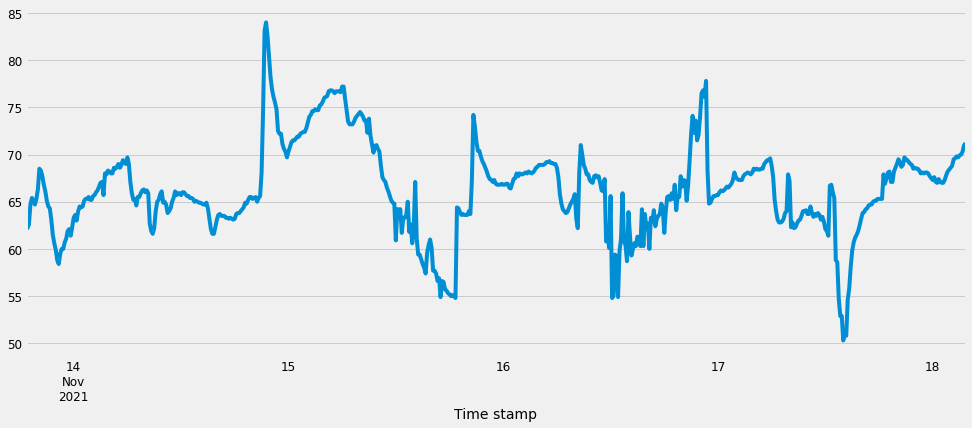

In [436]:
yNew.plot(figsize=(15, 6))
plt.show()

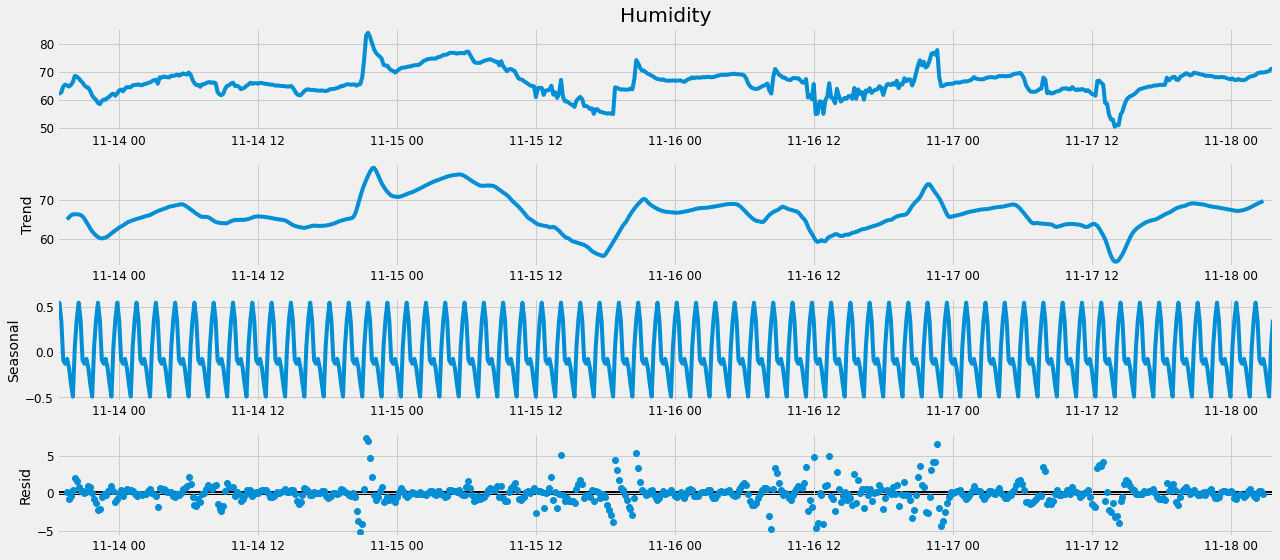

In [437]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(yNew, model='additive',period=10)
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA

In [438]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [439]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yNew, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
        except:
            continue
        

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60637D+00    |proj g|=  2.94245D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.942D-06   5.606D+00
  F =   5.6063705126196641     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7077.239586926016
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.90339D+00    |proj g|=  1.09803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     26      1     0     0   7.684D-06   4.903D+00
  F =   4.9033948624260226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6192.084316381641
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88501D+00    |proj g|=  4.16478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3533.011328121868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88947D+00    |proj g|=  1.02009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   1.020D-03   2.889D+00
  F =   2.8894651375094105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3650.505003536876
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  2.85802D+00    |proj g|=  6.15619D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     22      1     0     0   3.838D-05   2.858D+00
  F =   2.8580161095821426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3612.816330292664
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80679D+00    |proj g|=  5.15614D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-8.213E-03  -gs= 3.993E-04 BFGS update SKIPPED

At iterate   10    f=  2.79636D+00    |proj g|=  9.40016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     28      1     1     0   2.504D-07   2.796D+00
  F =   2.7963618954582397     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3535.0087120682983
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23105D+00    |proj g|=  8.05653D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.22991D+00    |proj g|=  1.11585D-02

At iterate   10    f=  5.22040D+00    |proj g|=  1.46531D-01

At iterate   15    f=  5.14519D+00    |proj g|=  4.70223D-01

At iterate   20    f=  4.92181D+00    |proj g|=  1.33738D-01

At iterate   25    f=  4.92133D+00    |proj g|=  2.33893D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     27     35      1     0     0   1.630D-06   4.921D+00
  F =   4.9213268721813037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6214.714512692805
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  2.70223D+00    |proj g|=  1.33618D+00

At iterate    5    f=  2.52527D+00    |proj g|=  8.40664D-02

At iterate   10    f=  2.49228D+00    |proj g|=  1.38419D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     13      1     0     0   1.142D-06   2.492D+00
  F =   2.4922753326453138     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3149.251469798386
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  2.91829D+00    |proj g|=  7.50387D-01

At iterate   20    f=  2.50334D+00    |proj g|=  4.09850D-01

At iterate   25    f=  2.50035D+00    |proj g|=  2.59494D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     50      1     0     0   2.595D-04   2.500D+00
  F =   2.5003452298724773     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3161.4356800990663
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  4.58296D+00    |proj g|=  7.06991D-01

At iterate   15    f=  2.93064D+00    |proj g|=  8.56981D-01

At iterate   20    f=  2.51432D+00    |proj g|=  3.05082D-01

At iterate   25    f=  2.45603D+00    |proj g|=  4.76212D-01

At iterate   30    f=  2.45269D+00    |proj g|=  8.53899D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     67      1     0     0   8.539D-06   2.453D+00
  F =   2.4526893028802044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3103.293900234818
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.42164D+00    |proj g|=  3.20345D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   4.488D-06   2.422D+00
  F =   2.4216444365238678     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3062.1152788931213
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66168D+00    |proj g|=  1.75557D+00

At iterate    5    f=  2.42919D+00    |proj g|=  1.01532D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2671.7955743166467
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85084D+00    |proj g|=  2.16719D-01

At iterate    5    f=  1.78304D+00    |proj g|=  9.47146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   4.635D-06   1.783D+00
  F =   1.7830414615722447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2254.198324504173
RUNNING THE L-BFGS-B 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86343D+00    |proj g|=  1.96403D-01

At iterate    5    f=  1.79105D+00    |proj g|=  4.27315D-02

At iterate   10    f=  1.78304D+00    |proj g|=  7.10353D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     25      1     0     0   8.018D-07   1.783D+00
  F =   1.7830414081773753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2256.1982571198478
RUNNING THE L-

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   5.622D-08   2.112D+00
  F =   2.1121386061129956     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2669.5189209146006
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89131D+00    |proj g|=  1.72987D-01

At iterate    5    f=  1.78038D+00    |proj g|=  1.47782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2261.401365072491
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78225D+00    |proj g|=  7.57083D-03

At iterate    5    f=  1.78215D+00    |proj g|=  6.14656D-03

At iterate   10    f=  1.78193D+00    |proj g|=  1.69995D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   9.076D-07   1.782D+00
  F =   1.7819345635559825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.95721D+00    |proj g|=  8.50811D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   7.694D-07   1.957D+00
  F =   1.9572068781371552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2475.99508020909
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90058D+00    |proj g|=  1.65971D-01

At iterate    5    f=  1.78694D+00    |proj g|=  4.15583D-02
  ys=-7.069E-03 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     30      1     0     0   2.539D-03   1.787D+00
  F =   1.7872287395049071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2261.482669255193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09176D+00    |proj g|=  2.44532D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78010D+00    |proj g|=  1.33589D-01

At iterate   10    f=  1.77365D+00    |proj g|=  3.58376D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     22      1     0     0   3.587D-05   1.774D+00
  F =   1.7736463499624240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2244.341693652579
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26365D+00    |proj g|=  9.74844D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2261.619173285179
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09246D+00    |proj g|=  8.02437D-01

At iterate    5    f=  1.88480D+00    |proj g|=  1.78410D+00

At iterate   10    f=  1.80264D+00    |proj g|=  2.30857D-01

At iterate   15    f=  1.79462D+00    |proj g|=  1.83072D-02

At iterate   20    f=  1.78686D+00    |proj g|=  3.61377D-01

At iterate   25    f=  1.78682D+00    |proj g|=  5.20227D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2451.3184387136143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98405D+00    |proj g|=  2.70462D-01

At iterate    5    f=  1.80374D+00    |proj g|=  2.34001D-01

At iterate   10    f=  1.77375D+00    |proj g|=  5.92818D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     27      1     0     0   1.643D-05   1.774D+00
  F =   1.7736460112484700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.79262D+00    |proj g|=  1.58664D-01

At iterate   10    f=  1.78477D+00    |proj g|=  1.06647D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   1.076D-03   1.785D+00
  F =   1.7847657181818819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2260.374336345535
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08607D+00    |proj g|=  5.91247D-03

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.77292D+00    |proj g|=  1.24625D-01

At iterate   10    f=  1.77155D+00    |proj g|=  6.35167D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     16      1     0     0   5.442D-06   1.772D+00
  F =   1.7715497074104885     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2243.6957307520365
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26441D+00    |proj g|=  9.75122D-01

At iterate   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2263.3759521193824
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09055D+00    |proj g|=  8.02250D-01

At iterate    5    f=  1.88238D+00    |proj g|=  1.28804D+00

At iterate   10    f=  1.81757D+00    |proj g|=  3.37924D-01


 This problem is unconstrained.



At iterate   15    f=  1.79326D+00    |proj g|=  6.27685D-01

At iterate   20    f=  1.79258D+00    |proj g|=  1.76945D-01

At iterate   25    f=  1.79224D+00    |proj g|=  2.07763D-02

At iterate   30    f=  1.79118D+00    |proj g|=  2.51705D-01

At iterate   35    f=  1.78437D+00    |proj g|=  1.34885D-01

At iterate   40    f=  1.78434D+00    |proj g|=  1.28887D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     64      1     0     0   1.289D-04   1.784D+00
  F =   1.7843401047557759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2261.837212201


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.93759D+00    |proj g|=  4.47515D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   1.711D-06   1.938D+00
  F =   1.9375797453100863     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2453.225638581329
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98093D+00    |proj g|=  2.63278D-01


 This problem is unconstrained.



At iterate    5    f=  1.81910D+00    |proj g|=  2.74873D-01

At iterate   10    f=  1.77290D+00    |proj g|=  9.83217D-02

At iterate   15    f=  1.77156D+00    |proj g|=  1.15138D-02

At iterate   20    f=  1.77155D+00    |proj g|=  2.41700D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     30      1     0     0   1.997D-04   1.772D+00
  F =   1.7715494550140580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2245.695412227741
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2673.2633447412254
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89400D+00    |proj g|=  1.73309D-01

At iterate    5    f=  1.78306D+00    |proj g|=  7.41954D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   5.091D-06   1.783D+00
  F =   1.7830247180085432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2256.1771941267816
RUNNING THE L-BFGS-B

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.78435D+00    |proj g|=  1.64370D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   1.676D-06   1.784D+00
  F =   1.7843503354536194     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2259.8501233424677
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96960D+00    |proj g|=  9.91773D-02

At iterate    5    f=  1.95469D+00    |proj g|=  3.74864D-05

           * 

 This problem is unconstrained.



At iterate    5    f=  1.78306D+00    |proj g|=  1.45093D-02

At iterate   10    f=  1.78302D+00    |proj g|=  5.52484D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     23      1     0     0   2.329D-07   1.783D+00
  F =   1.7830246815229418     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2258.1771480819525
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85639D+00    |proj g|=  3.61220D-01

At iterate   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.79406D+00    |proj g|=  1.40696D-01

At iterate   10    f=  1.78172D+00    |proj g|=  4.86931D-04

At iterate   15    f=  1.78171D+00    |proj g|=  4.08345D-03

At iterate   20    f=  1.78148D+00    |proj g|=  6.51489D-03

At iterate   25    f=  1.78098D+00    |proj g|=  3.29166D-02

At iterate   30    f=  1.77930D+00    |proj g|=  2.12938D-02

At iterate   35    f=  1.77762D+00    |proj g|=  3.81386D-03

At iterate   40    f=  1.77761D+00    |proj g|=  7.50267D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     63      1     0     0   7.503D-07   1.778D+00
  F =   1.77761499560

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.11217D+00    |proj g|=  4.77345D-03

At iterate   15    f=  2.11212D+00    |proj g|=  1.06981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     24      1     0     0   1.070D-06   2.112D+00
  F =   2.1121226106493172     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2671.498734639438
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89219D+00    |proj g|=  1.72086D-01

At iterate    

 This problem is unconstrained.



At iterate   15    f=  1.78440D+00    |proj g|=  7.11897D-04

At iterate   20    f=  1.78438D+00    |proj g|=  1.68075D-02

At iterate   25    f=  1.78402D+00    |proj g|=  8.94215D-03

At iterate   30    f=  1.78286D+00    |proj g|=  4.64979D-02

At iterate   35    f=  1.78074D+00    |proj g|=  8.25135D-02

At iterate   40    f=  1.78013D+00    |proj g|=  8.25414D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     61      1     0     0   2.719D-05   1.780D+00
  F =   1.7801334438096075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2254.528406087

 This problem is unconstrained.



At iterate   15    f=  1.78139D+00    |proj g|=  1.61653D-02

At iterate   20    f=  1.78128D+00    |proj g|=  7.07359D-04

At iterate   25    f=  1.78116D+00    |proj g|=  2.36660D-02

At iterate   30    f=  1.78087D+00    |proj g|=  1.06733D-02

At iterate   35    f=  1.77996D+00    |proj g|=  4.36171D-02

At iterate   40    f=  1.77805D+00    |proj g|=  3.21745D-02

At iterate   45    f=  1.77723D+00    |proj g|=  4.92159D-03

At iterate   50    f=  1.77720D+00    |proj g|=  1.37137D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71      1     0     0   1.371D-05   1.777D+00
  F =   1.77719944515

 This problem is unconstrained.



At iterate   10    f=  1.95004D+00    |proj g|=  5.33680D-02

At iterate   15    f=  1.94803D+00    |proj g|=  1.52938D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     25      1     0     0   3.186D-06   1.948D+00
  F =   1.9480349693024468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2466.420131259688
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90156D+00    |proj g|=  1.64969D-01


 This problem is unconstrained.



At iterate    5    f=  1.78212D+00    |proj g|=  1.82536D-01

At iterate   10    f=  1.77928D+00    |proj g|=  3.25845D-03

At iterate   15    f=  1.77789D+00    |proj g|=  9.40476D-02

At iterate   20    f=  1.77509D+00    |proj g|=  2.17161D-02

At iterate   25    f=  1.77502D+00    |proj g|=  3.83645D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     40      1     0     0   3.866D-06   1.775D+00
  F =   1.7750212576802660     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2250.076827192496


In [440]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2232.2870358740765
mod = sm.tsa.statespace.SARIMAX(yNew,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90156D+00    |proj g|=  1.64969D-01


 This problem is unconstrained.



At iterate    5    f=  1.78212D+00    |proj g|=  1.82536D-01

At iterate   10    f=  1.77928D+00    |proj g|=  3.25845D-03

At iterate   15    f=  1.77789D+00    |proj g|=  9.40476D-02

At iterate   20    f=  1.77509D+00    |proj g|=  2.17161D-02

At iterate   25    f=  1.77502D+00    |proj g|=  3.83645D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     40      1     0     0   3.866D-06   1.775D+00
  F =   1.7750212576802660     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [441]:
# new_index = pd.period_range(yNew.index[0], yNew.index[-1], freq='10min')
# ts_log = yNew
# ts_log.index = new_index




In [442]:
# ts_log

In [443]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2232.2870358740765
mod = sm.tsa.statespace.SARIMAX(yNew,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90156D+00    |proj g|=  1.64969D-01


 This problem is unconstrained.



At iterate    5    f=  1.78212D+00    |proj g|=  1.82536D-01

At iterate   10    f=  1.77928D+00    |proj g|=  3.25845D-03

At iterate   15    f=  1.77789D+00    |proj g|=  9.40476D-02

At iterate   20    f=  1.77509D+00    |proj g|=  2.17161D-02

At iterate   25    f=  1.77502D+00    |proj g|=  3.83645D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     40      1     0     0   3.866D-06   1.775D+00
  F =   1.7750212576802660     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

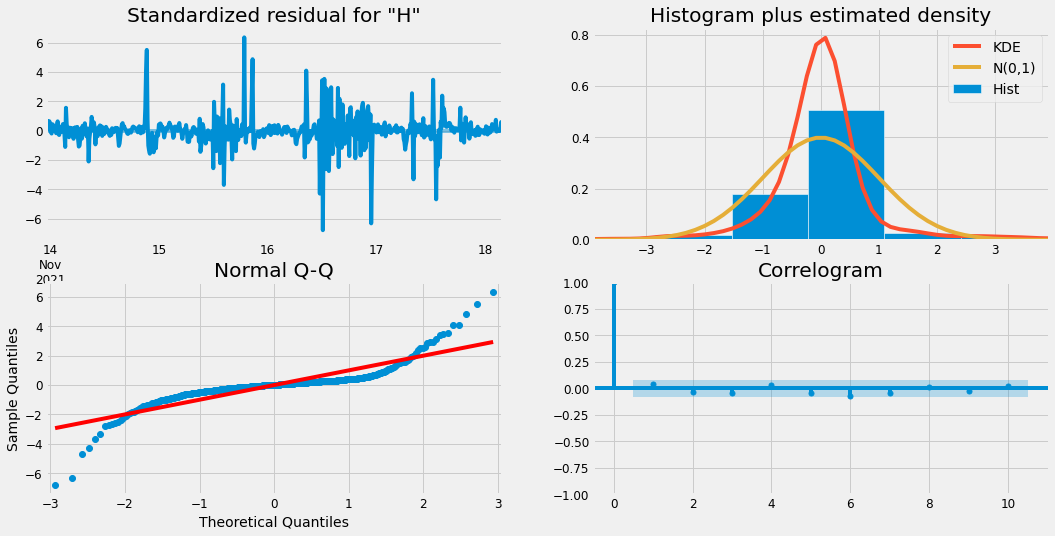

In [444]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

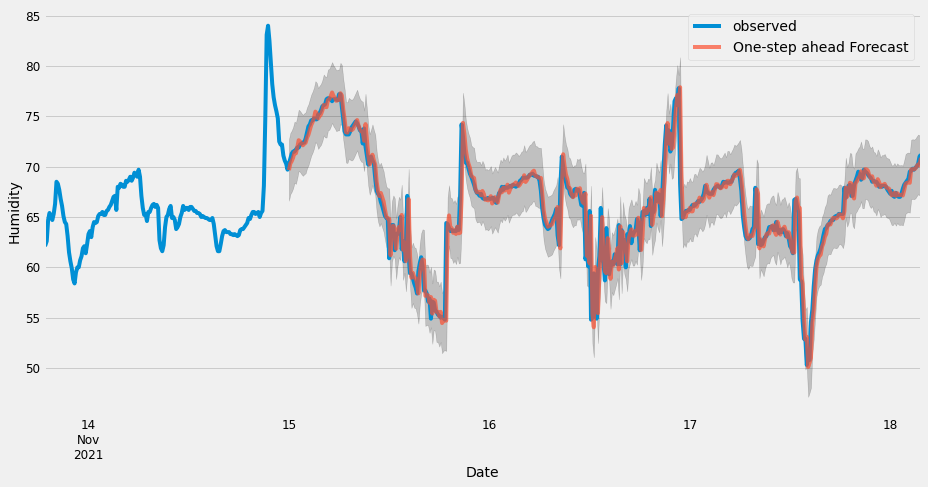

In [468]:
pred = results.get_prediction(start=pd.to_datetime('2021-11-15 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = yNew[0:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.legend()
plt.show()

In [469]:
y_forecasted = pred.predicted_mean
y_truth = yNew['2021-11-17 00:00:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1.27
The Root Mean Squared Error of our forecasts is 1.13


In [470]:
# new_index = pd.period_range(yNew.index[0], yNew.index[-1], freq='10min')
# ts_log = yNew.reindex(new_index)

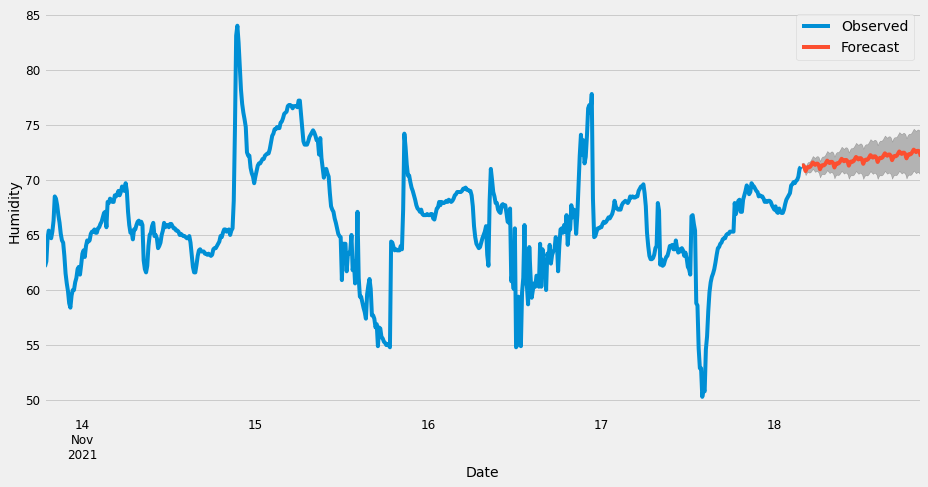

In [471]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int(alpha = 0.9)
# print(pred_ci)
ax = yNew.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.legend()
plt.show()

In [472]:
#  https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b